<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Способ-1.-Взвешивание-классов" data-toc-modified-id="Способ-1.-Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Способ 1. Взвешивание классов</a></span></li><li><span><a href="#Способ-2.-Увеличение-выборки." data-toc-modified-id="Способ-2.-Увеличение-выборки.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Способ 2. Увеличение выборки.</a></span></li><li><span><a href="#Способ-3.-Уменьшение-выборки." data-toc-modified-id="Способ-3.-Уменьшение-выборки.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Способ 3. Уменьшение выборки.</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve 
from sklearn.linear_model import LogisticRegression 

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<b>Признаки</b>
<br><code>RowNumber</code> — индекс строки в данных
<br><code>CustomerId</code> — уникальный идентификатор клиента
<br><code>Surname</code> — фамилия
<br><code>CreditScore</code> — кредитный рейтинг
<br><code>Geography</code> — страна проживания
<br><code>Gender</code> — пол
<br><code>Age</code> — возраст
<br><code>Tenure</code> — сколько лет человек является клиентом банка
<br><code>Balance</code> — баланс на счёте
<br><code>NumOfProducts</code> — количество продуктов банка, используемых клиентом
<br><code>HasCrCard</code> — наличие кредитной карты
<br><code>IsActiveMember</code> — активность клиента
<br><code>EstimatedSalary</code> — предполагаемая зарплата

<b>Целевой признак</b>
<br><code>Exited</code> — факт ухода клиента

In [5]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

В признаке "Сколько лет человек является клиентом банка" 909 пропущенных значений, предлагаю их дропнуть.

In [7]:
data['Tenure'] = data['Tenure'].fillna(0)

In [8]:
data['Tenure_mean'] = data['Tenure'].mean()

In [9]:
for tenure in data.index:
    data.loc[(data['Tenure'] == 0), 'Tenure'] = data.loc[tenure, 'Tenure_mean']


data['Tenure'].value_counts()

4.5434     1291
1.0000      952
2.0000      950
8.0000      933
3.0000      928
5.0000      927
7.0000      925
4.0000      885
9.0000      882
6.0000      881
10.0000     446
Name: Tenure, dtype: int64

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>,
        <AxesSubplot:title={'center':'Tenure_mean'}>]], dtype=object)

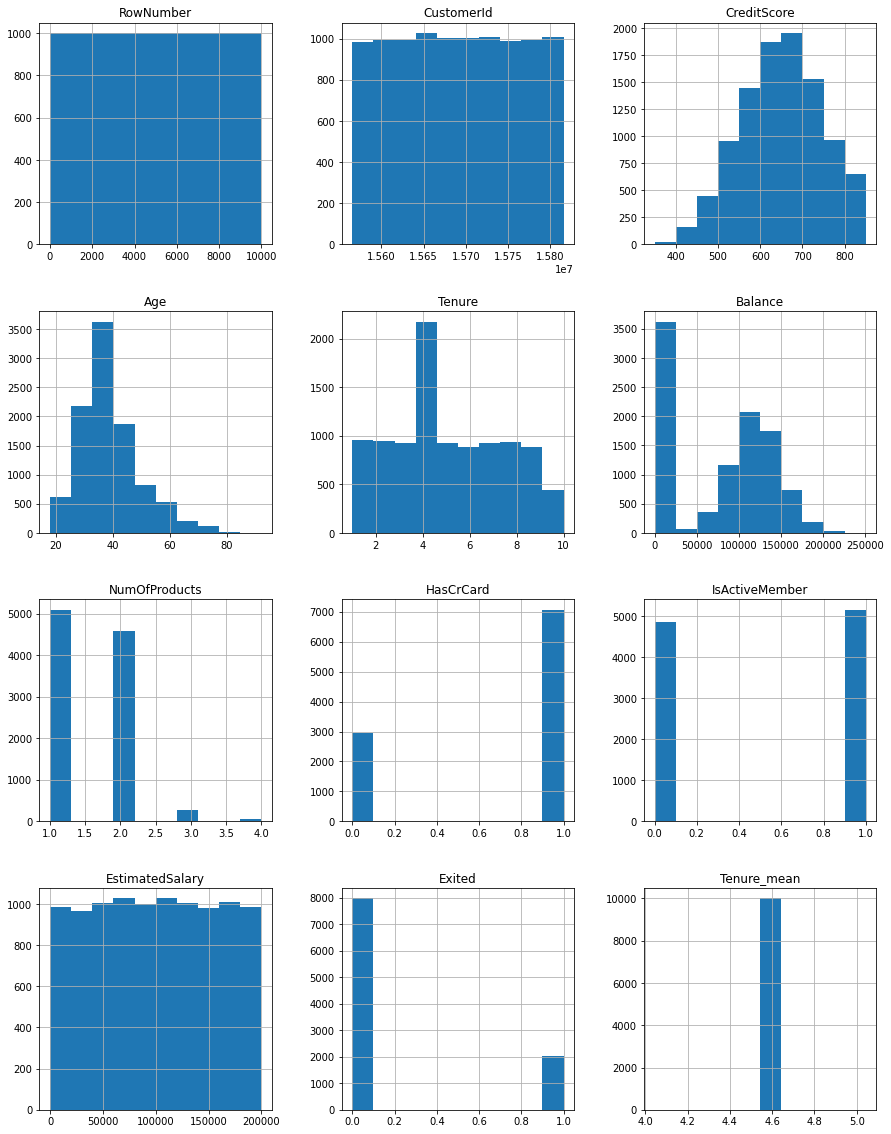

In [10]:
data.hist(figsize=(15, 20))

In [11]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_mean
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.129953,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,4.543400e+00
std,2886.89568,7.193619e+04,96.653299,10.487806,2.583137,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,8.882228e-16
min,1.00000,1.556570e+07,350.000000,18.000000,1.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,4.543400e+00
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,4.543400e+00
50%,5000.50000,1.569074e+07,652.000000,37.000000,4.543400,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,4.543400e+00
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,4.543400e+00
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,4.543400e+00


In [12]:
data['Balance'].value_counts()

0.00         3617
105473.74       2
130170.82       2
72594.00        1
139723.90       1
             ... 
130306.49       1
92895.56        1
132005.77       1
166287.85       1
104001.38       1
Name: Balance, Length: 6382, dtype: int64

3617 записей с нулевым балансом. Заполню средним значением.

In [13]:
data['Balance_mean'] = data['Balance'].mean()

In [14]:
for balance in data.index:
    data.loc[(data['Balance'] == 0), 'Balance'] = data.loc[balance, 'Balance_mean']


data['Balance'].value_counts()

76485.889288     3617
105473.740000       2
130170.820000       2
86102.270000        1
170288.380000       1
                 ... 
136525.990000       1
130306.490000       1
92895.560000        1
132005.770000       1
104001.380000       1
Name: Balance, Length: 6382, dtype: int64

In [15]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

В целевом признаке класс «0» встречается чаще класса «1». Дисбаланс.

<b>Признаки</b>
<br><code>RowNumber</code> — индекс строки в данных
<br><code>CustomerId</code> — уникальный идентификатор клиента
<br><code>Surname</code> — фамилия

Можно дропнуть, они нам не пригодятся в исследовании.

In [16]:
data_to_ohe = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Balance_mean', 'Tenure_mean'], axis=1)

In [17]:
data_to_ohe.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Разобъем данные на выборки.

In [18]:
df_train, df_valid = train_test_split(data_to_ohe, test_size=0.20, random_state=12345) 

In [19]:
df_features_train = df_train.drop(['Exited'], axis=1)
df_target_train = df_train['Exited']

In [20]:
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

In [21]:
features_train, features_test,target_train, target_test  = train_test_split(df_features_train, df_target_train, 
                                                                            test_size = 0.25, random_state=12345, 
                                                                            stratify=df_target_train)

In [22]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

In [23]:
print('\n','Размер датасета',data_to_ohe.shape,'\n', 'Признаки тренеровочной выборки',features_train.shape,'\n','Таргет тренировочной выборки', target_train.shape,'\n','Признаки валид. выборки', features_valid.shape,'\n','Таргет валид. выборки', target_valid.shape,'\n','Признаки тестовой', features_test.shape,'\n','Таргет тестовой', target_test.shape)


 Размер датасета (10000, 11) 
 Признаки тренеровочной выборки (6000, 11) 
 Таргет тренировочной выборки (6000,) 
 Признаки валид. выборки (2000, 11) 
 Таргет валид. выборки (2000,) 
 Признаки тестовой (2000, 11) 
 Таргет тестовой (2000,)


### Вывод
Размер датасета небольшой. В целевом признаке несбалансированны классы: больше всего преобладает класс "0".
В признаках есть пропуски, их немного, поэтому было принятно решение их дропнуть. Пустые значения в балансе были заполнены медианным значением.

Сам датасет разделила на 3 выборки: тренировочную, валидационную и тестовую.

## Исследование задачи

Подберем модель и параметры

<b>Случайный лес

In [24]:
model_rf = RandomForestClassifier()

In [25]:
params_rf = {"n_estimators" : [10, 50, 100], 
          "criterion" : ['gini', 'entropy', 'log_loss'], 
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth' : [1,10,30,50,100]
         }

In [26]:
gs_rf = GridSearchCV(estimator = model_rf,
                  param_grid = params_rf,
                  cv = 3,
                  verbose = 4)

In [27]:
%%time
gs_rf.fit(features_train, target_train)

Fitting 3 folds for each of 135 candidates, totalling 405 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=10; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=10; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=10; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=50; total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=50; total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=50; total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=100; total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=100; total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=100; total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 10, 30, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             verbose=4)

In [28]:
best_gs_rf = gs_rf.best_estimator_

In [29]:
print(best_gs_rf)

RandomForestClassifier(max_depth=10, max_features='sqrt')


Попробуем посмотреть, как протестируется модель с дисбалансом

In [30]:
%%time
model = RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2', random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5531914893617021
CPU times: user 839 ms, sys: 3.95 ms, total: 843 ms
Wall time: 855 ms


## Борьба с дисбалансом

### Способ 1. Взвешивание классов

Рандомный лес

In [31]:
model = RandomForestClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5371775417298938


Логичстическая регрессия

In [32]:
model = LogisticRegression(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4435736677115987


### Способ 2. Увеличение выборки.

In [33]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [34]:
target_train.value_counts()

0    4792
1    1208
Name: Exited, dtype: int64

In [35]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [37]:
target_upsampled.value_counts()

1    4832
0    4792
Name: Exited, dtype: int64

Рандомный лес

In [38]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5849802371541503


Логистическая регрессия

In [39]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.08677685950413223


### Способ 3. Уменьшение выборки.

In [40]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [41]:
target_train.value_counts()

0    4792
1    1208
Name: Exited, dtype: int64

In [42]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

In [43]:
target_downsampled.value_counts()

0    1438
1    1208
Name: Exited, dtype: int64

Рандомный лес

In [44]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6140177690029616


Логистическая регрессия

In [45]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.08677685950413223


## Тестирование модели

In [46]:
features = pd.concat([features_train, features_valid])
target = pd.concat([target_train, target_valid])

In [47]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [48]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

In [49]:
params_rf = {"n_estimators" : [10, 50, 100, 200], 
          "criterion" : ['gini', 'entropy', 'log_loss'], 
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth' : [1,10,30,50,100]
         }

In [50]:
gs_rf = GridSearchCV(estimator = model_rf,
                  param_grid = params_rf,
                  cv = 3,
                  verbose = 4)

In [51]:
%%time
gs_rf.fit(features_upsampled, target_upsampled)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=10; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=10; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=10; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=50; total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=50; total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=50; total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=100; total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=100; total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, n_estimators=100; total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 10, 30, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=4)

In [52]:
best_est_rf = gs_rf.best_estimator_

In [53]:
print(best_est_rf)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt')


In [54]:
model = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt', random_state=12345)
model.fit(features_upsampled, target_upsampled)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       random_state=12345)

In [55]:
predictions_test = model.predict(features_test)

In [56]:
print("F1:", f1_score(target_test, predictions_test))

F1: 0.6057298772169168


ROC-Кривая

In [57]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test, average=None)

print(auc_roc)

0.8434797227878131


<Figure size 432x288 with 0 Axes>

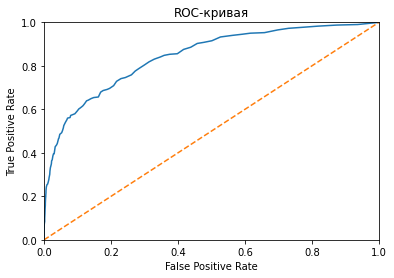

In [58]:
plt.figure()

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr, tpr)


plt.plot([0.0, 1.0], [0.0, 1.0], linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])



plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.title('ROC-кривая')
plt.show()

<div class="alert alert-block alert-info">
<b>Вывод:</b>

<br>В данной работе мы сделали:
    
<br>Загрузили и подготовили данные. Заменили средним значением такие признаки, как: баланс на счёте и сколько лет человек является клиентом банка. Дропнули признаки, которые не окажут влияния на обучение модели.
    
<br>Исследовали баланс классов - в данных большой дисбаланс классов. Класс "0" превосходит почти в 4 раза. После обучения модели без учёта дисбаланса получили F1 - 0.55.
    
<br>Улучшили качество модели подбором параметров и учили дисбаланс классов (уменьшением выборки). Добились F1 - 0.60 и ROC AUC 0.84.
</div>

<div class="alert alert-block alert-info">
Рекомендации:
        Проверять на адекватность данные: большой дисбаланс в таргете, есть пропущенные значения в признаках.
</div>